In [1]:
import sys
import os
sys.path.append(
    os.path.dirname(os.path.abspath('.'))
)
from src import QNet, agent_metrics, show_reward
### path load

import numpy as np
import torch
from torchvision import datasets
from matplotlib import pyplot as plt

from settings.shift_funcs import get_funcs

SEED = 0
device = 'cuda:0'

In [2]:
# テストデータのロードまたは作成
funcs = [get_funcs(*delta) for delta in [(2, 2), (2, 0), (0, 2)]]
actions = [lambda x: x] + [f[1] for f in funcs]
np.random.seed(SEED)
test_dataset_context = np.load('data/shift1/test_dataset.npz')
origin = test_dataset_context['original_dataset']
test_dataset = test_dataset_context['test_dataset']
test_func_labels = test_dataset_context['test_func_labels']
test_dataset = torch.from_numpy(test_dataset).to(device)
origin = torch.from_numpy(origin).to(device)

In [6]:
# 訓練済みモデルをロード
Qnet = QNet(c=1, m=[20, 20, len(actions)]).to(device)
Qnet.load_state_dict(torch.load('results/fail1/shift1/channel01_weight000_seed00/Qnet020000.pth'))
result = agent_metrics(test_dataset, origin, Qnet, actions, channel=1, gpu=device)
result[:, -1].mean()

ValueError: not enough values to unpack (expected 2, got 1)

In [9]:
# 2c weight 000
Qnet = QNet(c=2, m=[20, 20, len(actions)]).to(device)
Qnet.load_state_dict(torch.load('results/shift1/diag/channel02_weight005_seed00/Qnet020000.pth'))
result = agent_metrics(test_dataset, origin, Qnet, actions, channel=2, gpu=device)
result[:, -1].mean()

9072.260041394044

In [10]:
np.save('results/shift1/diag/channel02_weight005_seed00/metrics.np', result)

10000


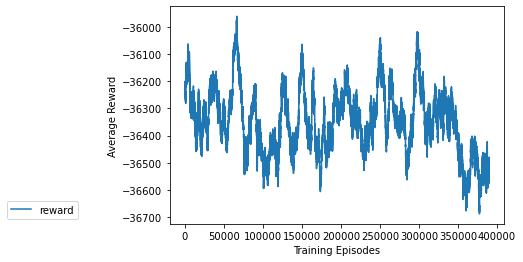

In [8]:
## rewardの確認
reward_path = 'results/fail1/shift1/diag/channel02_weight005_seed00/'
ax = plt.subplot(111)
ma = show_reward(ax, dir_path=reward_path, mono=False, n=10000, label='reward')
plt.show()

### channel 2, weight 0.05のQ関数を学習した結果

100000


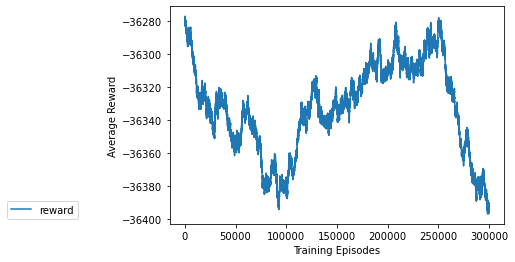

In [21]:
## rewardの確認
reward_path = 'results/shift1/diag_hori/channel01_weight000_seed00/'
ax = plt.subplot(111)
ma = show_reward(ax, dir_path=reward_path, mono=False, n=100000, label='reward')
plt.show()

In [22]:
import pickle 
with open('results/shift1/diag_hori/channel01_weight000_seed00/reward.pkl', 'rb') as f:
    reward = pickle.load(f)
reward[0]

-33942.28271484375

In [16]:
plt.hist(result[:, -1], bins=np.linspace(-0.1, 1, 100))
plt.show()

NameError: name 'result' is not defined

0.0

In [26]:
data = np.load('data/train_dataset.npz')
train_dataset = data['train_dataset']
train_dataset = torch.from_numpy(train_dataset).to(torch.float)
original_dataset = data['original_dataset']

In [27]:
train_dataset.shape

torch.Size([4000, 28, 28])

In [28]:
original_dataset.shape

(4000, 28, 28)